## Sampling and preparing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
control = pd.read_csv('Tests for correlation/control_assignments_results_revised2.csv').set_index('student_id')
test = pd.read_csv('Tests for correlation/test_assignments_results_revised2.csv').set_index('student_id')

In [16]:
control['mc_answered'].value_counts()

7.0    769
0.0    343
6.0     24
1.0     16
2.0     16
5.0     10
3.0     10
4.0      8
Name: mc_answered, dtype: int64

In [12]:
control.columns

Index([u'count', u'assignment_id', u'grade', u'submitted_or_active',
       u'class_code', u'product_id', u'time_assignment_started',
       u'time_assignment_submitted', u'question_id_11459_answer',
       u'question_id_11459_score', u'question_id_11460_answer',
       u'question_id_11460_score', u'question_id_11461_answer',
       u'question_id_11461_score', u'mc_question_count', u'mc_answered',
       u'mc_correct', u'Unnamed: 18', u'Unnamed: 19', u'Unnamed: 20',
       u'Unnamed: 21', u'Unnamed: 22', u'Unnamed: 23', u'Unnamed: 24',
       u'Unnamed: 25', u'Unnamed: 26', u'Unnamed: 27', u'Unnamed: 28',
       u'Unnamed: 29', u'Unnamed: 30', u'Unnamed: 31', u'Unnamed: 32',
       u'Unnamed: 33', u'Unnamed: 34', u'Unnamed: 35', u'Unnamed: 36',
       u'Unnamed: 37', u'Unnamed: 38', u'Unnamed: 39', u'Unnamed: 40',
       u'Unnamed: 41', u'Unnamed: 42', u'Unnamed: 43', u'Unnamed: 44',
       u'Unnamed: 45', u'Unnamed: 46', u'Unnamed: 47', u'Unnamed: 48',
       u'Unnamed: 49', u'Unnamed

In [19]:
index_questions = control[(control['mc_answered']==7.)&\
                          (~control['question_id_11459_score'].isna())&\
                          (~control['question_id_11460_score'].isna())&(~control['question_id_11459_score'].isna())].index

In [20]:
control_open = control.loc[index_questions][[u'question_id_11459_score', 
                          u'question_id_11460_score', 
                          u'question_id_11461_score']].mean(axis=1,skipna=True)

# OJO: este máximo es dudoso dudoso...
control_closed = control.loc[index_questions]['mc_correct']\
                             .divide(7)

In [22]:
len(control_closed)

80

In [23]:
stats.pearsonr(control_open,control_closed)

(0.37456346929624762, 0.00061938032349090062)

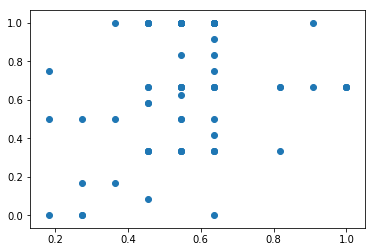

In [32]:
plt.scatter(control_closed,control_open)

In [35]:
stats.pearsonr([1,2,3,4,5],[1,0,-1,-2,-3])

(-1.0, 0.0)

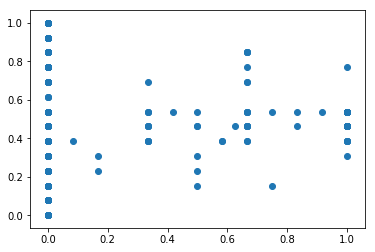

In [15]:
plt.scatter(control_open.fillna(0),control_closed.fillna(0))

In [78]:
test_open = test[[u'question_id_11459_score', 
                          u'question_id_11460_score', 
                          u'question_id_11461_score']].mean(axis=1)

test_closed = test['multiple_choice_total_score']/control['multiple_choice_total_score'].max()

In [35]:
answers = pd.read_excel('litmus_results_trial1.xlsx').set_index('student_id')
repeated_index = answers.index.value_counts()[answers.index.value_counts()>1].index.values
answers.loc[repeated_index].to_excel('repeated_students.xlsx')
closed_answers = pd.read_excel('litmus_results_trial2 (1).xlsx').set_index('student_id')

In [37]:
answers['question_id_11459_answer'].count()

1603

In [38]:
answers['question_id_11460_answer'].count()

1541

In [39]:
answers['question_id_11461_answer'].count()

1471

In [34]:
answers_graded = answers.dropna(how='any',subset=['question_id_11459_score',
                                                  'question_id_11460_score',
                                                  'question_id_11461_score'])
answers_graded.to_excel('graded_open_answers.xlsx')

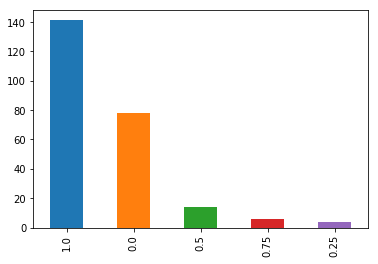

In [24]:
answers_graded['question_id_11459_score'].value_counts().plot(kind='bar')

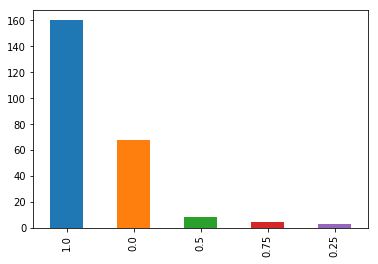

In [26]:
answers_graded['question_id_11460_score'].value_counts().plot(kind='bar')        

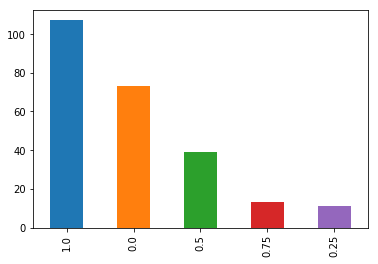

In [25]:
answers_graded['question_id_11461_score'].value_counts().plot(kind='bar')

In [31]:
answers_graded[answers_graded['question_id_11461_score']==.50]['question_id_11461_answer'].values

array([ u"At the beginning of the story Monica had a bad mood because she didn't want to go blueberry picking but at the end of the story Monica likes blueberry picking and she had a good mood at the end of the story.",
       u'Monica\u2019s response to her mother singing along to West Side Story change is.monicafeltmadatthebeginningofthestory.',
       u'Monica\u2019s response to her mother singing along to West Side Story change between the beginning and end of the story support your answer with evidence from the passage.',
       u'why does monica response her mother singing becouse her mother pretend be a rockstar or star in a kitchen',
       u'she say mom you can really sing.', u'believein make believe',
       u'She is in a better mood.',
       u'Her responce turns from good to sortof mean cause she just wants to leave picking berries.',
       u'Monica starts to singthat song in the blueberry patch and I think that is what makes her change in story I probable would have to.',

In [6]:
len(set(answers.index.values).intersection(set(closed_answers.index.values)))

102

In [24]:
open_score_avg = answers_graded[['question_id_11459_score',
                                  'question_id_11460_score',
                                  'question_id_11461_score']].mean(axis=1).values

closed_score_avg = closed_answers[[u'question_id_9802_score',
                                u'question_id_9803_score',
                                u'question_id_9804_score',
                                u'question_id_9805_score',
                                u'question_id_9806_score',
                                u'question_id_9807_score',
                                u'question_id_9808_score']].mean(axis=1).values

In [34]:
stats.ttest_ind(open_score_avg,closed_score_avg)

Ttest_indResult(statistic=2.6664965296316399, pvalue=0.0077244702282691534)

In [37]:
len(open_score_avg)

243

In [39]:
len(closed_score_avg)

1823

In [6]:
answers_graded.sample(21).to_excel('sample_of_graded_answeres.xlsx')

In [7]:
print(len(answers))
answers_subset = answers.dropna(how='all',subset=['question_id_11459_answer',
                                                  'question_id_11460_answer',
                                                  'question_id_11461_answer'])
print(len(answers_subset))
answers_subset = answers_subset[~answers_subset.index.isin(repeated_index)]
print(len(answers_subset))
answers_subset = answers_subset[~answers_subset.index.isin(answers_graded.index.values)]
print(len(answers_subset))

2824
1631
1583
1350


In [8]:
answers_subset[['question_id_11459_answer',
            'question_id_11460_answer',
            'question_id_11461_answer']].count()

question_id_11459_answer    1325
question_id_11460_answer    1265
question_id_11461_answer    1200
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(answers_subset['question_id_11459_answer'], 
                                                    answers_subset['question_id_11459_score'], 
                                                    test_size=0.875, 
                                                    random_state=42)

In [24]:
len(X_train)

168

In [17]:
Grading_test, Angela, Allison, David = np.split(X_train, [21,21+49,21+49*2])

In [33]:
np.sum([len(x) for x in [Grading_test, Angela, Allison, David]])

168

In [32]:
set(Allison.index.values).intersection(set(David.index.values))

set()

In [25]:
answers.loc[Grading_test.index.values].to_excel('Grading_test_ReadWorks.xlsx')
answers.loc[Angela.index.values].to_excel('Angela.xlsx')
answers.loc[Allison.index.values].to_excel('Allison.xlsx')
answers.loc[David.index.values].to_excel('David.xlsx')